<a href="https://colab.research.google.com/github/KubraErensoy/AirlinesSatisfaction/blob/main/Airlines_Customer_Satisfaction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [2]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [3]:
#Sutundaki attributes isimlerini değiştirme
df= df.rename(columns={"satisfaction"                      : "satisfaction",
                        "Gender"                           : "gender",
                        "Customer Type"                    : "customer_type",
                        "Age"                              : "age",
                        "Type of Travel"                   : "type_of_travel",
                        "Class"                            : "class",
                        "Flight Distance"                  : "flight_distance" ,
                        "Seat comfort"                     : "seat_comfort",
                        "Departure/Arrival time convenient": "departure_arrival_time_convenient",
                        "Food and drink"                   : "food_drink",
                        "Gate location"                    : "gate_location" ,
                        "Inflight wifi service"            : "inflight_wifi_service" ,
                        "Inflight entertainment"           : "inflight_entertainment",
                        "Online support"                   : "online_support",
                        "Ease of Online booking"           : "ease_of_online_booking",
                        "On-board service"                 : "on-board_service",
                        "Leg room service"                 : "leg_room_service",
                        "Baggage handling"                 : "baggage_handling",
                        "Checkin service"                  : "checkin_service",
                        "Cleanliness"                      : "cleanliness",
                        "Online boarding"                  : "online_boarding",
                        "Departure Delay in Minutes"       : "departure_delay_minutes",
                        "Arrival Delay in Minutes"         : "arrival_delay_in_minutes"

                        })
df.tail(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_drink,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_minutes,arrival_delay_in_minutes
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [4]:
#Veri setindeki toplam satır ve sutun sayısı
df.shape

(129880, 23)

In [5]:
# '.info' Looking at Data Types in Columns and checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   seat_comfort                       129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   food_drink                         129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  inflight_wifi_service              1298

-"arrival_delay_in_munites" sutununda null değerler var


In [6]:
df.isnull().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure_arrival_time_convenient      0
food_drink                             0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_minutes                0
arrival_delay_in_minutes             393
dtype: int64

In [7]:
df.duplicated().sum()



0

In [8]:
df.describe()


,age,flight_distance,seat_comfort,departure_arrival_time_convenient,food_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
#boş değeri silme
df.dropna(subset=['class'], inplace=True)


In [10]:
#boş olan değerleri dolduruyoruz
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean(),inplace=True)



In [11]:
df.isnull().sum()


satisfaction                         0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure_arrival_time_convenient    0
food_drink                           0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_minutes              0
arrival_delay_in_minutes             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   seat_comfort                       129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   food_drink                         129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  inflight_wifi_service              1298

In [13]:
df['flight_distance']=df['flight_distance'].astype('float')
df['seat_comfort']=df['seat_comfort'].astype('int')
df['food_drink']=df['food_drink'].astype('int')
df['gate_location']=df['gate_location'].astype('int')
df['inflight_wifi_service']=df['inflight_wifi_service'].astype('int')
df['inflight_entertainment']=df['inflight_entertainment'].astype('int')
df['ease_of_online_booking']=df['ease_of_online_booking'].astype('int')
df['on-board_service']=df['on-board_service'].astype('int')
df['leg_room_service']=df['leg_room_service'].astype('int')
df['baggage_handling']=df['baggage_handling'].astype('int')
df['checkin_service']=df['checkin_service'].astype('int')
df['cleanliness']=df['cleanliness'].astype('int')
df['online_boarding']=df['online_boarding'].astype('int')


In [14]:
df['departure_arrival_time_convenient']=df['departure_arrival_time_convenient'].astype('int')


In [15]:
df['online_support']=df['online_support'].astype('int')



# Data analysis

In [16]:
#benzer sutun olup olmadığını kontrol etme
corr=df.corr()
corr

<ipython-input-16-79b6a9dd1f8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,age,flight_distance,seat_comfort,departure_arrival_time_convenient,food_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_minutes,arrival_delay_in_minutes
age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011229
flight_distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109912
seat_comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025465
departure_arrival_time_convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002595
food_drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014857
gate_location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003634
inflight_wifi_service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035215
inflight_entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033268
online_support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036028
ease_of_online_booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039746


In [17]:
df.describe(include='object')

,satisfaction,gender,customer_type,type_of_travel,class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [18]:
print(df['age'])

0         65
1         47
2         15
3         60
4         70
          ..
129875    29
129876    63
129877    69
129878    66
129879    38
Name: age, Length: 129880, dtype: int64


In [19]:
def age_grouoped(age):
    if age > 70:
        return 'Seniors'
    elif age > 55:
        return 'Adults'
    elif age > 35:
        return 'Young Adults'
    elif age > 12:
        return 'Teenagers'
    else:
        return 'children'

In [20]:
df["age"] = df["age"].apply(age_grouoped)

In [21]:
df["satisfaction"].value_counts()



satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [22]:
df["gender"].value_counts()


Female    65899
Male      63981
Name: gender, dtype: int64

In [23]:
df["customer_type"].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

In [24]:
df["age"].value_counts()


Young Adults    56856
Teenagers       46951
Adults          20315
children         4794
Seniors           964
Name: age, dtype: int64

In [25]:
df["type_of_travel"].value_counts()


Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

In [26]:
df["class"].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: class, dtype: int64

<ipython-input-27-a3609f04cb28>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Oranges", annot=True)


<Axes: title={'center': 'Airlines Satisfacion Correlation Matrix'}>

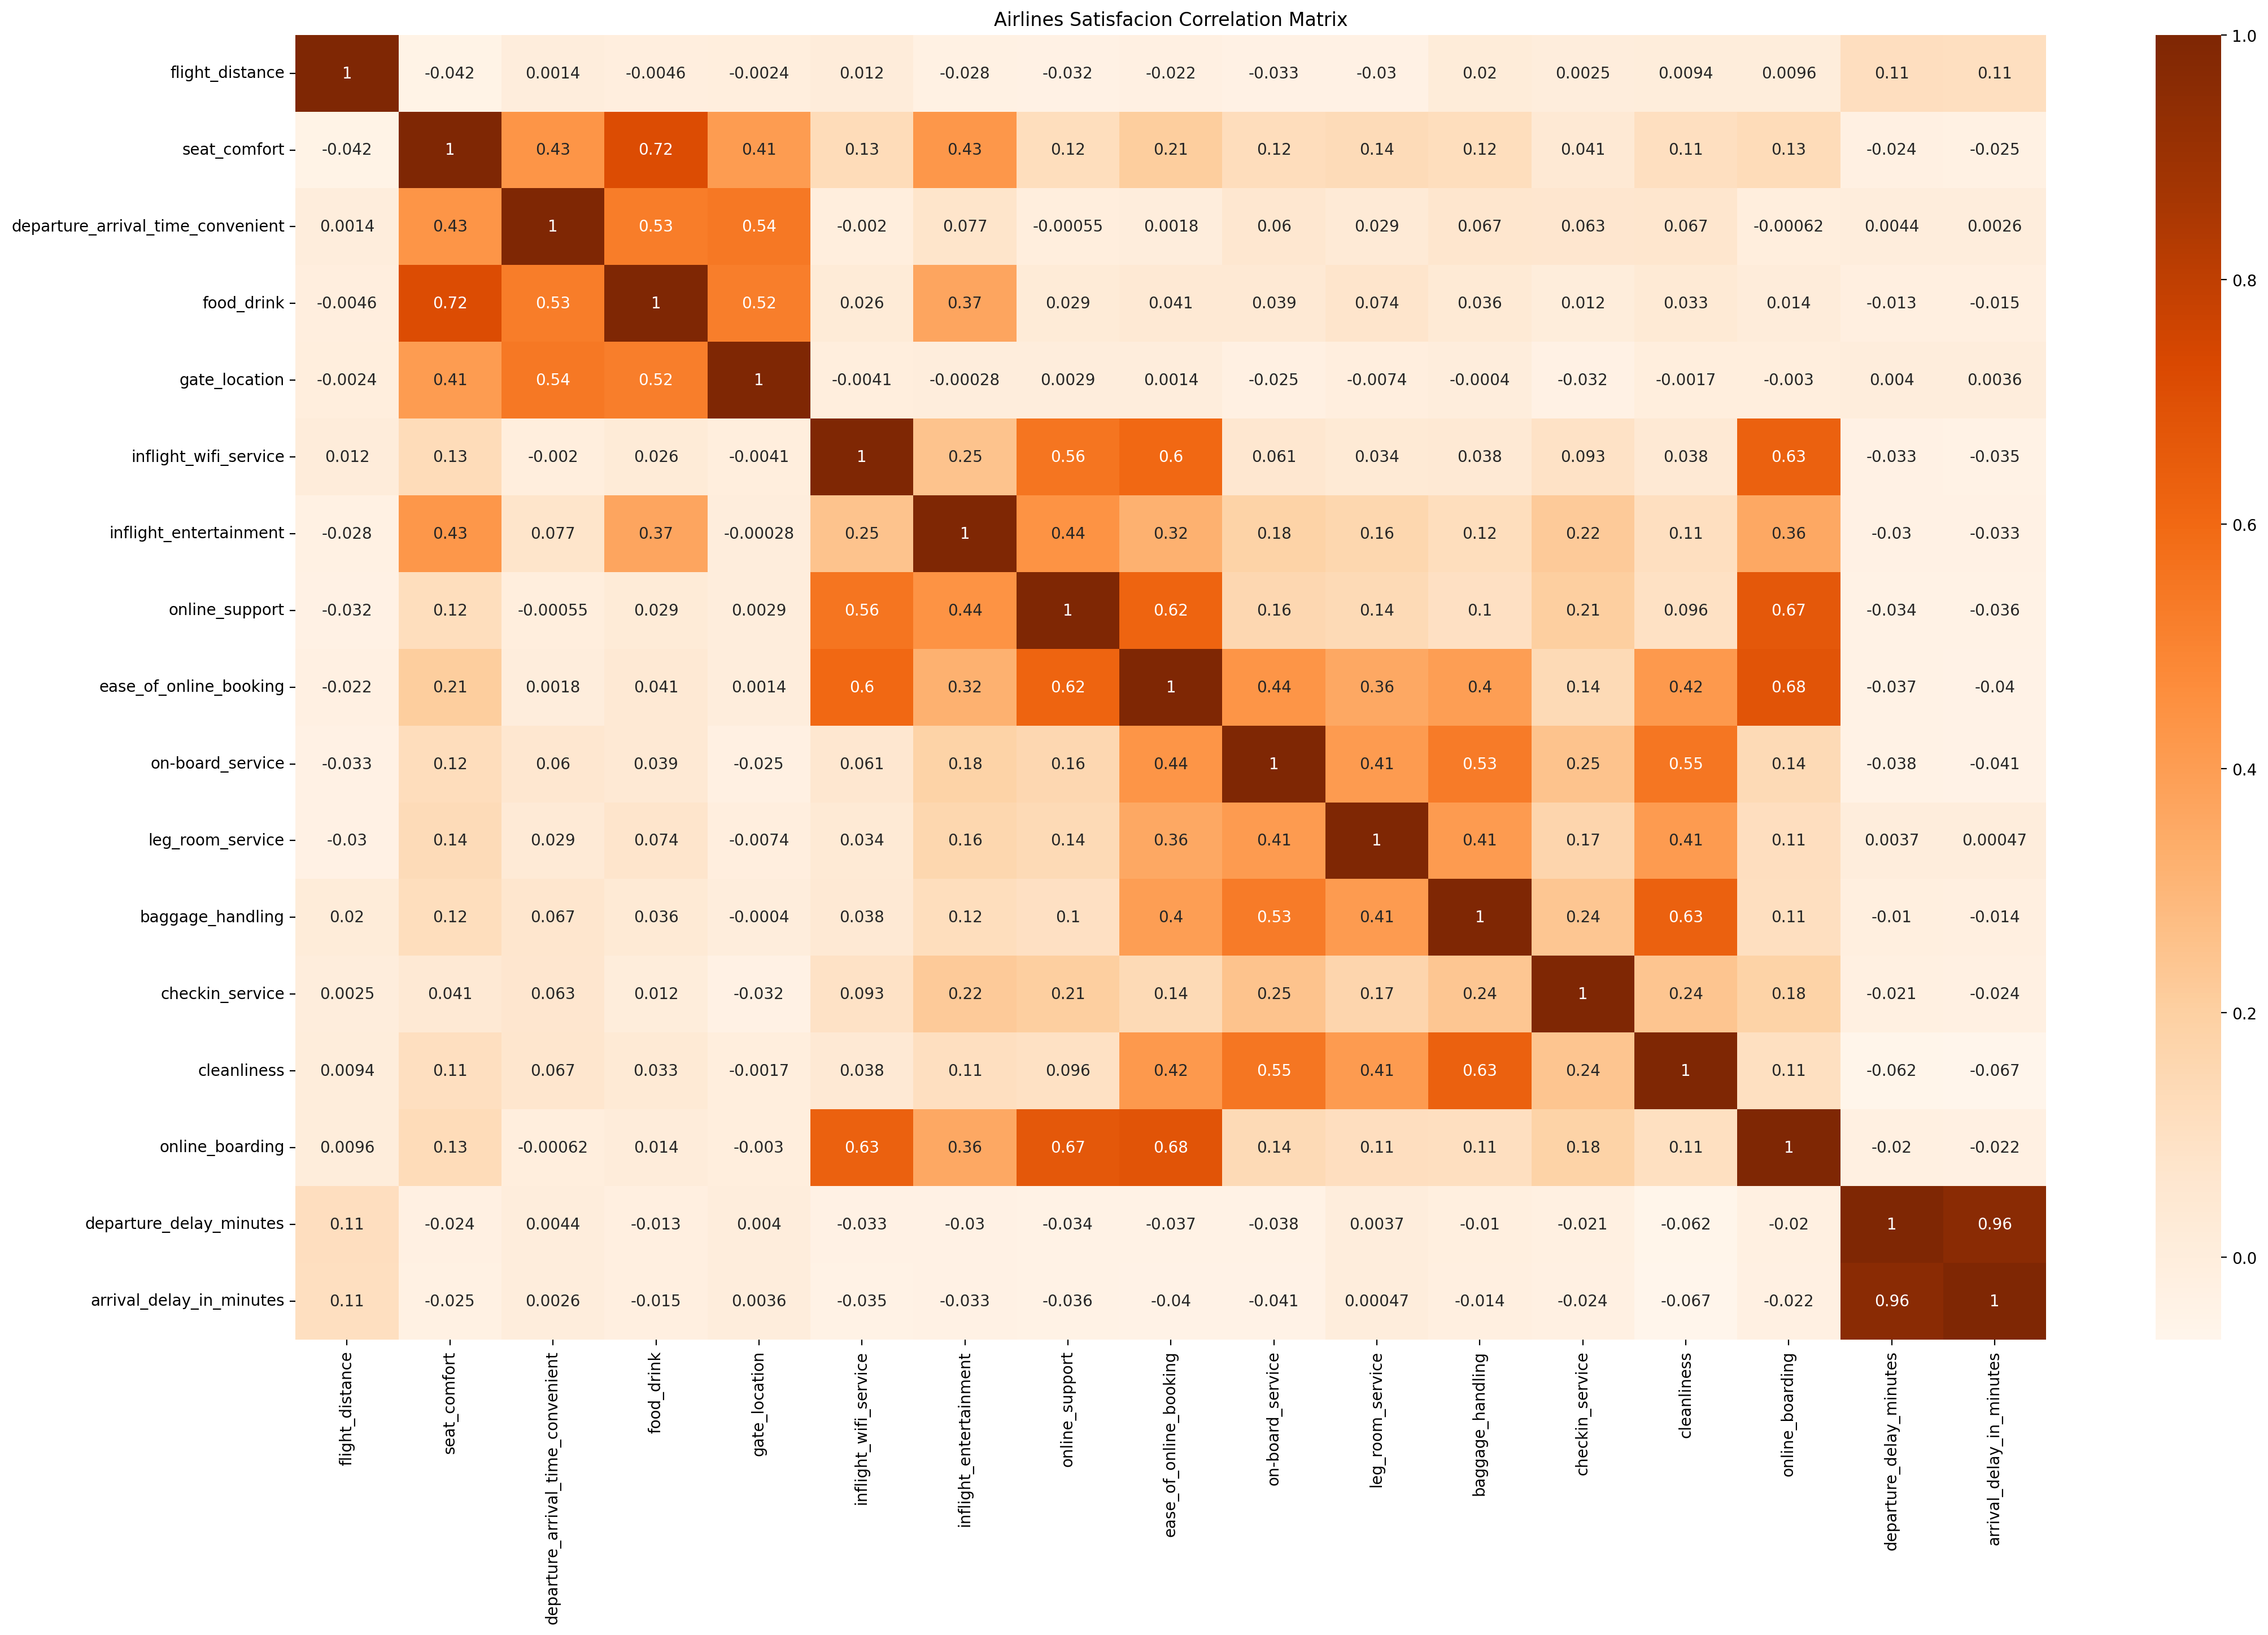

In [27]:
plt.figure(figsize=(25,15),dpi=200)
plt.title("Airlines Satisfacion Correlation Matrix", c="black")
sns.heatmap(df.corr(), cmap="Oranges", annot=True)

# Data Preprocessing

In [31]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
#sınıflandırma için object değerleri int çevirme
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=='object':
        l_en=LabelEncoder()
        df[col] = l_en.fit_transform(df[col])

# Classification

In [36]:
x = df.drop(["satisfaction"], axis=1)
y = df["satisfaction"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) # Don't forget the validation step :)


In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [39]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [41]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [42]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [44]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
87.11,KNN
81.59,Naive Bayes
80.40,Logistic Regression
62.12,Support Vector Machines


In [45]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.95369556 0.95545535 0.95094589 0.95644523 0.95633524 0.95380554
 0.95754042 0.95325047 0.95644044 0.95336047]
Mean: 0.9547274592146293
Standard Deviation: 0.0019281540850101036


In [46]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
inflight_entertainment,0.193
seat_comfort,0.132
ease_of_online_booking,0.074
online_support,0.064
customer_type,0.047
on-board_service,0.044
food_drink,0.042
leg_room_service,0.040
class,0.038


<Axes: xlabel='feature'>

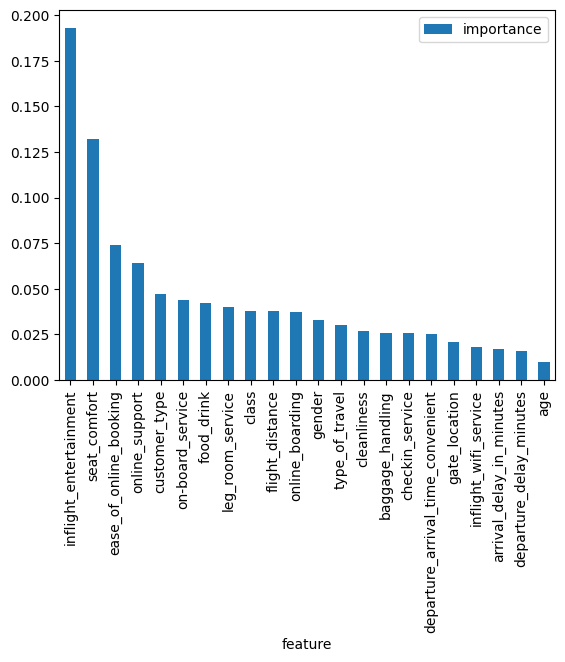

In [47]:
importances.plot.bar()